##                                                  Experiment 7
# Aim - To write a program in PYTHON to implement Discrete Cosine Transform
# Name - Param Nagda                          
# Roll No - C035
# Class - BTech EXTC                            
# Batch - B2
# Date of Experiment - 26/08/20         
# Date of Submission - 02/09/20

In [47]:
import cv2
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct,idct

In [48]:
a = np.array([[2,4,4,2],[4,6,8,3],[2,8,10,4],[3,8,6,2]])
b = scipy.fftpack.dct(a)

In [49]:
scipy.fftpack.idct(b)/8

array([[ 2.,  4.,  4.,  2.],
       [ 4.,  6.,  8.,  3.],
       [ 2.,  8., 10.,  4.],
       [ 3.,  8.,  6.,  2.]])

In [50]:
a

array([[ 2,  4,  4,  2],
       [ 4,  6,  8,  3],
       [ 2,  8, 10,  4],
       [ 3,  8,  6,  2]])

In [51]:
# Applying dct and idct on an image
img = cv2.imread("home.jpeg",0)

In [52]:
def compress_img(img,t):   #img:Image, t:Threshold Percentage
    N=8
    m,n = img.shape
    
    # DCT of image
    imgdct = np.zeros((m,n), dtype=int)
    for i in range(0,m,N):
        for j in range(0,n,N):
            imgdct[i:i+N,j:j+N] = dct(dct(img[i:i+N,j:j+N],
                                    axis=0,norm='ortho'),
                                      axis=1,norm='ortho')
    #Compressiion Threshold
    th = np.sort(imgdct.ravel())[::-1][int(262143*t)]

    
    # Compression in DCT
    img_cdct = np.zeros((m,n), dtype=int)
    for i in range(m):
        for j in range(n):
            if np.abs(imgdct[i,j]) > th:
                img_cdct[i,j] = imgdct[i,j]
            else:
                img_cdct[i,j] = 0

                
    # IDCT
    img_new = np.zeros((m,n), dtype=int)
    for i in range(0,m,N):
        for j in range(0,n,N):
            img_new[i:i+N,j:j+N] = idct(idct(img_cdct[i:i+N,j:j+N],
                                    axis=0,norm='ortho'),
                                      axis=1,norm='ortho')
            
    # Compression Ratio
    ind,val = np.unique(img_cdct.ravel(),return_counts=True)
    nonzeros = np.sum(val[np.where(ind!=0)])
    
    return (img_new,round((m*n)/nonzeros,2))

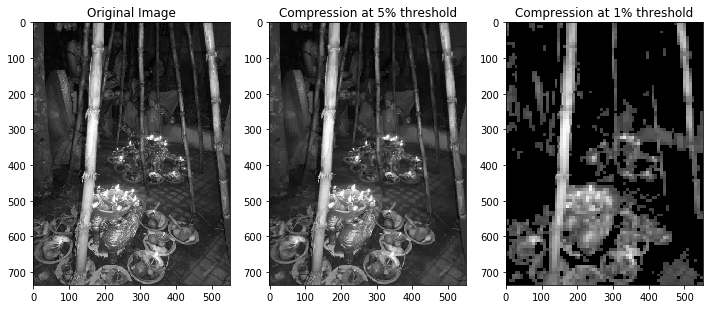

In [53]:
plt.figure(figsize=(12,12))
plt.subplot(131,title='Original Image')
plt.imshow(img,cmap='gray',vmin=0, vmax=255)
plt.subplot(132,title='Compression at 5% threshold')
plt.imshow(compress_img(img,0.05)[0],cmap='gray',vmin=0, vmax=255)
plt.subplot(133,title='Compression at 1% threshold')
plt.imshow(compress_img(img,0.01)[0],cmap='gray',vmin=0, vmax=255);

In [55]:
print('Compression Ratio (CR) at 5% threshold:',compress_img(img,0.05)[1])
print('Compression Ratio (CR) at 1% threshold:',compress_img(img,0.01)[1])

Compression Ratio (CR) at 5% threshold: 20.85
Compression Ratio (CR) at 1% threshold: 154.65


## Conclusion

We have used the technique of transform coding (Discrete Cosine Transform) to compact most information in a source sequence into a few elements of the transformed sequence using reversible transform and then discarding the elements of the sequence that do not contain much information to obtain compression. We took an image and applied dct. Using the output of dct we set a threshold(5% and 1%) and only the values above the threshold will be transmitted and the rest converted to 0. While decompressing the image we used inverse dct and observed that the output image of 5% threshold was similar to the original image while for 1% threshold value the image was blur because of loss of certain pixel values. The Compression Ratio observed for 5% and 1% was 20.85 and 154.65 respectively.